# Imports

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt


# Activity 1

## 1.1 Sub-activity: Open Data COVID-19 API

### Task 1

In [2]:
from requests import get
def get_api_data(filters, structure):
    base_url = 'https://api.coronavirus.data.gov.uk/v1/data?' # base url for api request
    
    filters_str_list = []
    for key, value in filters.items(): #iterate filters
        filters_str_list.append(f'{key}={value}') #get key value pairs from filters
    filters_str = ';'.join(filters_str_list) #append them to list, separated by ';' (api format)
    
    structure_str = json.dumps(structure) #converts structure into json format
    
    endpoint = f'{base_url}filters={filters_str}&structure={structure_str}' #put together as 1 string
    response = get(endpoint, timeout=10) #call api
    
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: {response.text}') #error handling
    return response.json()


### Task 2

In [3]:
national_filters = {"areaType": "nation"} #filters for national dictionary
national = { #national key pair values with their corresponding api structure metrics (from documentation)
    "date": "date",
    "areaName": "areaName",
    "daily cases": "newCasesBySpecimenDate",
    "cumulative cases": "cumCasesBySpecimenDate",
    "daily deaths": "newDeaths28DaysByDeathDate",
    "cumulative deaths": "cumDeaths28DaysByDeathDate",
    "cumulative vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
    "vaccination age": "vaccinationsAgeDemographics"
}

regional_filters = {"areaType": "region"} #filters for region dictionary
regional = { #regional key pair values with their corresponding api structure metrics (from documentation)
    "date": "date",
    "areaName": "areaName",
    "daily cases": "newCasesBySpecimenDate",
    "cumulative cases": "cumCasesBySpecimenDate",
    "daily deaths": "newDeaths28DaysByDeathDate",
    "cumulative deaths": "cumDeaths28DaysByDeathDate",
    "cumulative vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
    "vaccination age": "vaccinationsAgeDemographics"
}

london_filters = {"areaType": "region", "areaName": "London"} #london for whatever reason is not included in regions, so had to get sep
london_structure = {
    "date": "date",
    "areaName": "areaName",
    "daily cases": "newCasesBySpecimenDate",
    "cumulative cases": "cumCasesBySpecimenDate",
    "daily deaths": "newDeaths28DaysByDeathDate",
    "cumulative deaths": "cumDeaths28DaysByDeathDate",
    "cumulative vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
    "vaccination age": "vaccinationsAgeDemographics"
}

west_midlands_filters = {"areaType": "region", "areaName": "West Midlands"} #same with west midlands
west_midlands_structure = {
    "date": "date",
    "areaName": "areaName",
    "daily cases": "newCasesBySpecimenDate",
    "cumulative cases": "cumCasesBySpecimenDate",
    "daily deaths": "newDeaths28DaysByDeathDate",
    "cumulative deaths": "cumDeaths28DaysByDeathDate",
    "cumulative vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
    "vaccination age": "vaccinationsAgeDemographics"
}

south_east_filters = {"areaType": "region", "areaName": "South East"} # same with south east england
south_east_structure = {
    "date": "date",
    "areaName": "areaName",
    "daily cases": "newCasesBySpecimenDate",
    "cumulative cases": "cumCasesBySpecimenDate",
    "daily deaths": "newDeaths28DaysByDeathDate",
    "cumulative deaths": "cumDeaths28DaysByDeathDate",
    "cumulative vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
    "vaccination age": "vaccinationsAgeDemographics"
}

east_of_england_filters = {"areaType": "region", "areaName": "East of England"} # same with east of england
east_of_england_structure = {
    "date": "date",
    "areaName": "areaName",
    "daily cases": "newCasesBySpecimenDate",
    "cumulative cases": "cumCasesBySpecimenDate",
    "daily deaths": "newDeaths28DaysByDeathDate",
    "cumulative deaths": "cumDeaths28DaysByDeathDate",
    "cumulative vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
    "vaccination age": "vaccinationsAgeDemographics"
}

east_midlands_filters = {"areaType": "region", "areaName": "East Midlands"} # same with east midlands
east_midlands_structure = {
    "date": "date",
    "areaName": "areaName",
    "daily cases": "newCasesBySpecimenDate",
    "cumulative cases": "cumCasesBySpecimenDate",
    "daily deaths": "newDeaths28DaysByDeathDate",
    "cumulative deaths": "cumDeaths28DaysByDeathDate",
    "cumulative vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
    "vaccination age": "vaccinationsAgeDemographics"
}

north_east_filters = {"areaType": "region", "areaName": "North East"} # same with north east england
north_east_structure = {
    "date": "date",
    "areaName": "areaName",
    "daily cases": "newCasesBySpecimenDate",
    "cumulative cases": "cumCasesBySpecimenDate",
    "daily deaths": "newDeaths28DaysByDeathDate",
    "cumulative deaths": "cumDeaths28DaysByDeathDate",
    "cumulative vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
    "vaccination age": "vaccinationsAgeDemographics"
}

results_national = get_api_data(national_filters, national) #call api for national data
results_regional = get_api_data(regional_filters, regional) #call api for regional data
results_london = get_api_data(london_filters, london_structure) #call api for london data
results_west_midlands = get_api_data(west_midlands_filters, west_midlands_structure) # call api for west midlands
results_south_east = get_api_data(south_east_filters, south_east_structure) # call api for south east
results_east_of_england = get_api_data(east_of_england_filters, east_of_england_structure) # call api for east of england
results_east_midlands = get_api_data(east_midlands_filters, east_midlands_structure) # call api for east midlands
results_north_east = get_api_data(north_east_filters, north_east_structure) # call api for north east

## 1.2 Sub-activity: Shaping the COVID data into different dataframes

### Task 3

In [4]:
concatenated_results = ( #concatenates all the results into a single list
    results_national["data"]
    + results_regional["data"]
    + results_london["data"]
    + results_west_midlands["data"]
    + results_south_east["data"]
    + results_east_of_england["data"]
    + results_east_midlands["data"]
    + results_north_east["data"]
)

### Task 4

In [5]:
df_covid_data = pd.DataFrame(concatenated_results) #convert to dataframe
#print(df_covid_data)
#unique_areas = df_covid_data['areaName'].unique()
#print(unique_areas)


### Task 5

In [6]:
df_covid_data = df_covid_data[df_covid_data['areaName'] != 'England'] #gets all areaName's that aren't 'England'
#print(df_covid_data)

### Task 6

In [7]:
df_covid_data = df_covid_data.rename(columns={'areaName': 'area'}) #assuming that the dataset has changed. there is no "name" so I changed areaName

### Task 7

In [8]:
df_covid_data['date'] = pd.to_datetime(df_covid_data['date']) # convert to date time
#print(df_covid_data['date'].dtype)

### Task 8

In [9]:
null_data = df_covid_data.isnull().sum() #get all null valyes
zero_data = (df_covid_data == 0).sum() #get all zero values
missing_data = null_data + zero_data #my method was to get the sum of null values and 0 values in each column (pandas df does this automatically)
print("Dataframe summary:")
display(df_covid_data)
print("Missing data:")
display(missing_data)

Dataframe summary:


,date,area,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,vaccination age
1414,2023-06-29,Northern Ireland,NaN,NaN,NaN,NaN,NaN,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1415,2023-06-28,Northern Ireland,NaN,NaN,NaN,NaN,NaN,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1416,2023-06-27,Northern Ireland,NaN,NaN,NaN,NaN,NaN,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1417,2023-06-26,Northern Ireland,NaN,NaN,NaN,NaN,NaN,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1418,2023-06-25,Northern Ireland,NaN,NaN,NaN,NaN,NaN,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
...,...,...,...,...,...,...,...,...
16807,2020-03-06,North East,1.0,5.0,NaN,NaN,NaN,[]
16808,2020-03-05,North East,2.0,4.0,NaN,NaN,NaN,[]
16809,2020-03-04,North East,1.0,2.0,NaN,NaN,NaN,[]
16810,2020-03-03,North East,0.0,1.0,NaN,NaN,NaN,[]


Missing data:


date                        0
area                        0
daily cases               456
cumulative cases          293
daily deaths             3525
cumulative deaths        2495
cumulative vaccinated    5292
vaccination age             0
dtype: int64

### Task 9

In [10]:
# Commented out below was my original attempt, which manually attempted to backfill, however it didn't achieve great results, so I ended up using the
# pandas .bfill method (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.backfill.html).
"""for index, row in df_covid_data.iterrows(): #iterate through each row in covid data
    cumulative_columns = ["cumulative deaths", "cumulative cases", "cumulative vaccinated"] #list of cumulative columns
    for column in cumulative_columns: #iterate through each type of cumulative column
        if pd.isna(row[column]) or row[column] == 0: #check to see if value in row, column is null or equals 0
            area = row["area"] #get current area
            date = row["date"] #get current date
            filter = (df_covid_data["area"] == area) & (df_covid_data["date"] < date) # filter df so that it only shows the correct area and dates before the most recent
            filtered_df = df_covid_data.loc[filter, [column, "date"]] #create a new df with filter applied

            if not filtered_df.empty:# make sure the filtered df isn't empty
                filtered_df = filtered_df.sort_values(by="date", ascending=False) # sort by date in descending order to get most recent
                most_recent_value = filtered_df.iloc[0][column] # get most recent value [0]
                df_covid_data.at[index, column] = most_recent_value # update the missing value"""

cumulative_columns = ["cumulative deaths", "cumulative cases", "cumulative vaccinated"] # list of cumulative columns
for column in cumulative_columns:
    df_covid_data[column] = df_covid_data.groupby('area')[column].transform('bfill') #use bfill
missing_data2 = df_covid_data.isnull().sum() #get sum of null values remaining in dataframe
display(missing_data2)

date                        0
area                        0
daily cases               293
cumulative cases            0
daily deaths             2495
cumulative deaths         257
cumulative vaccinated    4907
vaccination age             0
dtype: int64

### Task 10

In [11]:
cumulative_columns = ["cumulative deaths", "cumulative cases", "cumulative vaccinated"] #cumulative columns
df_covid_data.dropna(subset=cumulative_columns, inplace=True) #drop the rows with null values in either of the columns

missing_data3 = df_covid_data.isnull().sum()
display(missing_data3)

date                        0
area                        0
daily cases                 9
cumulative cases            0
daily deaths             1954
cumulative deaths           0
cumulative vaccinated       0
vaccination age             0
dtype: int64

### Task 11

In [12]:
df_covid_data = df_covid_data.sort_values(by=['area', 'date']) # sort by area and date

# My original plan was to calculate the rolling average by taking the previous 7 days, getting their sum, and dividing it by 7.
# I could not get this implementation to work however, so I resorted to using the .rolling method from the pandas documentation:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
# My original attempt is commented out beneath this implementation.

df_covid_data['daily cases roll avg'] = df_covid_data.groupby('area')['daily cases'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)
df_covid_data['daily deaths roll avg'] = df_covid_data.groupby('area')['daily deaths'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)
display(df_covid_data.head())

"""def seven_day_average(df, name): # function to get 7 day average
    new_column = name # passed in name
    df[new_column] = 0.0 # initially fill with data
    for index, row in df.iterrows(): # iterate through dataframe
        current_date = row['date']
        current_area = row['area']
        last_7_days = df[(df['area'] == current_area) & (df['date'] >= current_date - pd.DateOffset(days=6))] # get the values of the last 7 days
        last_7_days_sum = last_7_days[name].sum() #total the values of the last 7 days
        df[index, new_column] = last_7_days_sum / 7 #put value in position in new column
    return df

df_covid_data = seven_day_average(df_covid_data, 'daily_cases_roll_avg') # call function for daily cases
df_covid_data = seven_day_average(df_covid_data, 'daily_deaths_roll_avg') # call function for daily deaths

print(df_covid_data.head())"""

# I think the main issue with this failed implementation is that when totalling the values, having null or missing values would prevent the mean calculation working.

,date,area,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,vaccination age,daily cases roll avg,daily deaths roll avg
15138,2020-12-08,East Midlands,1420.0,151661.0,32.0,5089.0,530.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1420.00,32.00
15137,2020-12-09,East Midlands,1410.0,153071.0,44.0,5133.0,541.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1415.00,38.00
15136,2020-12-10,East Midlands,1451.0,154522.0,41.0,5174.0,549.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1427.00,39.00
15135,2020-12-11,East Midlands,1444.0,155966.0,48.0,5222.0,563.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1431.25,41.25
15134,2020-12-12,East Midlands,1035.0,157001.0,53.0,5275.0,563.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1352.00,43.60


"def seven_day_average(df, name): # function to get 7 day average\n    new_column = name # passed in name\n    df[new_column] = 0.0 # initially fill with data\n    for index, row in df.iterrows(): # iterate through dataframe\n        current_date = row['date']\n        current_area = row['area']\n        last_7_days = df[(df['area'] == current_area) & (df['date'] >= current_date - pd.DateOffset(days=6))] # get the values of the last 7 days\n        last_7_days_sum = last_7_days[name].sum() #total the values of the last 7 days\n        df[index, new_column] = last_7_days_sum / 7 #put value in position in new column\n    return df\n\ndf_covid_data = seven_day_average(df_covid_data, 'daily_cases_roll_avg') # call function for daily cases\ndf_covid_data = seven_day_average(df_covid_data, 'daily_deaths_roll_avg') # call function for daily deaths\n\nprint(df_covid_data.head())"

### Task 12

In [13]:
df_covid_data = df_covid_data.drop(columns=['daily deaths', 'daily cases']) #drop columns
display(df_covid_data.head())

,date,area,cumulative cases,cumulative deaths,cumulative vaccinated,vaccination age,daily cases roll avg,daily deaths roll avg
15138,2020-12-08,East Midlands,151661.0,5089.0,530.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1420.00,32.00
15137,2020-12-09,East Midlands,153071.0,5133.0,541.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1415.00,38.00
15136,2020-12-10,East Midlands,154522.0,5174.0,549.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1427.00,39.00
15135,2020-12-11,East Midlands,155966.0,5222.0,563.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1431.25,41.25
15134,2020-12-12,East Midlands,157001.0,5275.0,563.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",1352.00,43.60


### Task 13

In [14]:
df_vaccinations = df_covid_data[['date', 'area', 'vaccination age']].copy() #get data from original df
df_covid_data.drop(columns=['vaccination age'], inplace=True) #drop vaccination age from original df
display(df_vaccinations.head())

,date,area,vaccination age
15138,2020-12-08,East Midlands,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
15137,2020-12-09,East Midlands,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
15136,2020-12-10,East Midlands,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
15135,2020-12-11,East Midlands,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
15134,2020-12-12,East Midlands,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."


### Task 14

In [15]:
df_vaccinations_wide = df_vaccinations.copy() #copy df_vaccinations
vaccinations_df = pd.json_normalize(df_vaccinations['vaccination age'].explode()) #get the json data from vaccination age and convert it to df dormat

columns_to_select = [ #these are the only columns needed from vaccination_df (there are 28 normally in total)
    'age',
    'VaccineRegisterPopulationByVaccinationDate',
    'cumPeopleVaccinatedCompleteByVaccinationDate',
    'newPeopleVaccinatedCompleteByVaccinationDate',
    'cumPeopleVaccinatedFirstDoseByVaccinationDate',
    'newPeopleVaccinatedFirstDoseByVaccinationDate',
    'cumPeopleVaccinatedSecondDoseByVaccinationDate',
    'newPeopleVaccinatedSecondDoseByVaccinationDate',
    'cumVaccinationFirstDoseUptakeByVaccinationDatePercentage',
    'cumVaccinationCompleteCoverageByVaccinationDatePercentage',
    'cumVaccinationSecondDoseUptakeByVaccinationDatePercentage'
]

vaccinations_df = vaccinations_df[columns_to_select] #filter using columns_to_select
df_vaccinations_wide = pd.concat([df_vaccinations_wide[['date', 'area']], vaccinations_df], axis=1) #merge the copied vaccinations dataframe and df containing vaccine age data

display(df_vaccinations_wide.head())


,date,area,age,VaccineRegisterPopulationByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationCompleteCoverageByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage
15138,2020-12-08,East Midlands,80_84,137817.0,133812.0,0.0,134387.0,1.0,133812.0,0.0,97.5,97.1,97.1
15137,2020-12-09,East Midlands,75_79,228104.0,220674.0,2.0,221717.0,0.0,220674.0,2.0,97.2,96.7,96.7
15136,2020-12-10,East Midlands,75+,494298.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
15135,2020-12-11,East Midlands,70_74,246594.0,235123.0,2.0,236606.0,1.0,235123.0,2.0,95.9,95.3,95.3
15134,2020-12-12,East Midlands,65_69,270187.0,253051.0,1.0,255183.0,0.0,253051.0,1.0,94.4,93.7,93.7


## 1.3 Sub-activity: Aggregating, plotting, and analysing

### Task 15

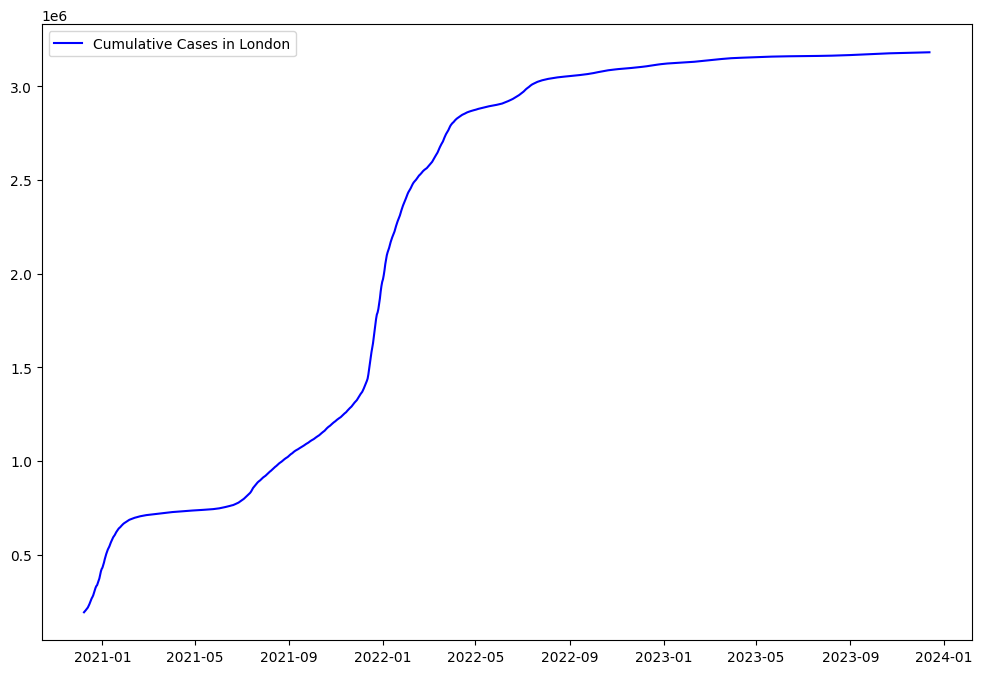

In [16]:
# 1. Aggregate the data
london_data = df_covid_data[df_covid_data['area'] == 'London'] # make london dataframe
# 2. Plot the data.
plt.figure(figsize=(12, 8)) #size
plt.plot(london_data['date'], london_data['cumulative cases'], label='Cumulative Cases in London', color='blue') #plot date against cumulative cases
plt.legend()
# 3. Question: Is there a period in time in which the cases plateaued?
# Answer: Cases plateaued slightly between January and July 2021, and have plateaued since October 2022.

### Task 16

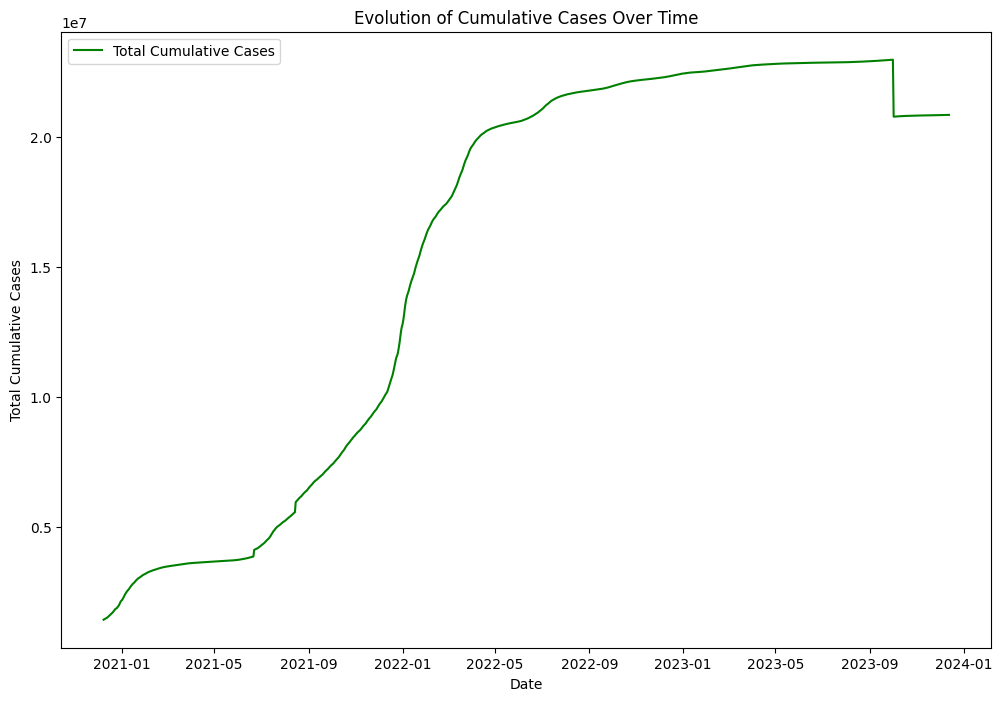

In [17]:
# 1. Aggregate the data
total_cases_over_time = df_covid_data.groupby('date')['cumulative cases'].sum().reset_index() #reset index return df back to normal after grouping
# 2. Plot the data.
plt.figure(figsize=(12, 8))
plt.plot(total_cases_over_time['date'], total_cases_over_time['cumulative cases'], label='Total Cumulative Cases', color='green') #plot total cases
plt.xlabel('Date')
plt.ylabel('Total Cumulative Cases') # Counted in 10s of millions.
plt.title('Evolution of Cumulative Cases Over Time')
plt.legend()
plt.show()
# As you can see in the plot, there is an issue with missing data. This may be because of the earlier backfilling not changing enough values,
# causing a lot of values to be dropped (questions 9 and 10). It may also be an issue with the gov data. Either way it's clear that the cases slowly rise.
# 3. Question: How does the pattern seen in London hold country-wide?
# The pattern in London is very similar to the pattern country wide. There's an initial increase (Jan 2021), followed by a much bigger increase around
# the end of 2021.

### Task 17

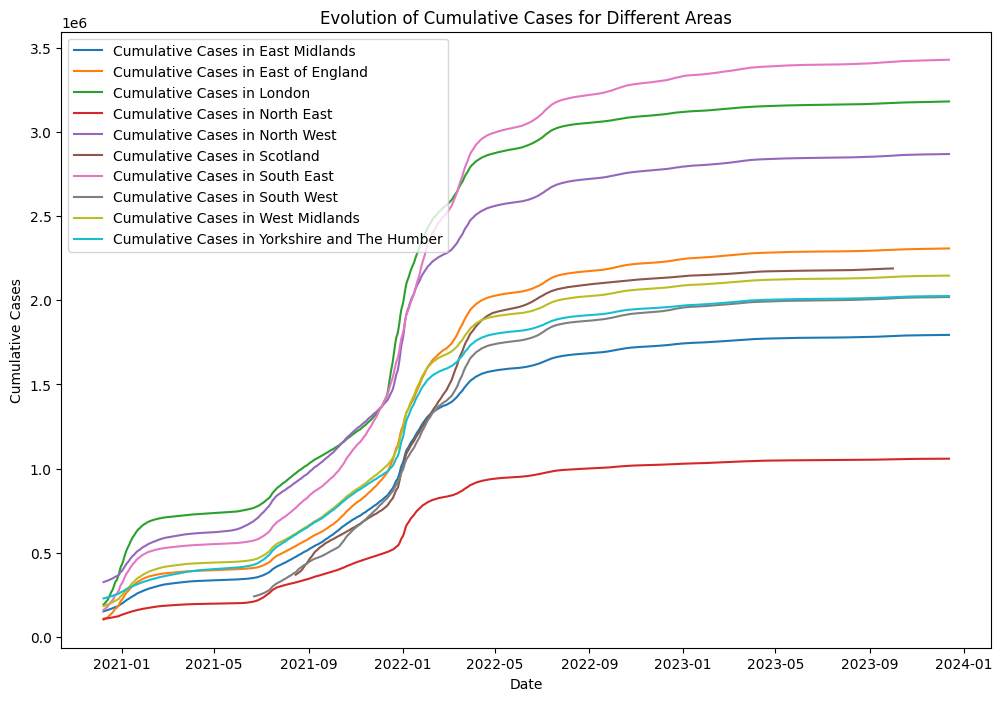

In [18]:
# 1. Aggregate the data
areas = df_covid_data['area'].unique() # get each unique area
# 2. Plot the data.
plt.figure(figsize=(12, 8))

for area in areas: #iterate through each area
    area_data = df_covid_data[df_covid_data['area'] == area]
    plt.plot(area_data['date'], area_data['cumulative cases'], label=f'Cumulative Cases in {area}') # plot area
plt.xlabel('Date')
plt.ylabel('Cumulative Cases') # in millions
plt.title('Evolution of Cumulative Cases for Different Areas')
plt.legend()
plt.show()
# 3. Question: What patterns do all nations/regions share?
# All regions (from the data we can observe) followed a similar pattern of a smaller rise in cases in Jan 2021, the a plateau until about July, then a
# ramp up until the end of 2022, where there's a big uptick in cases (with more of a plateau beginning in April 2022). This is highest in the South East,
# London and North East, as that is were the population is densest in the UK. Scotland data cuts of in July 2022.

### Task 18

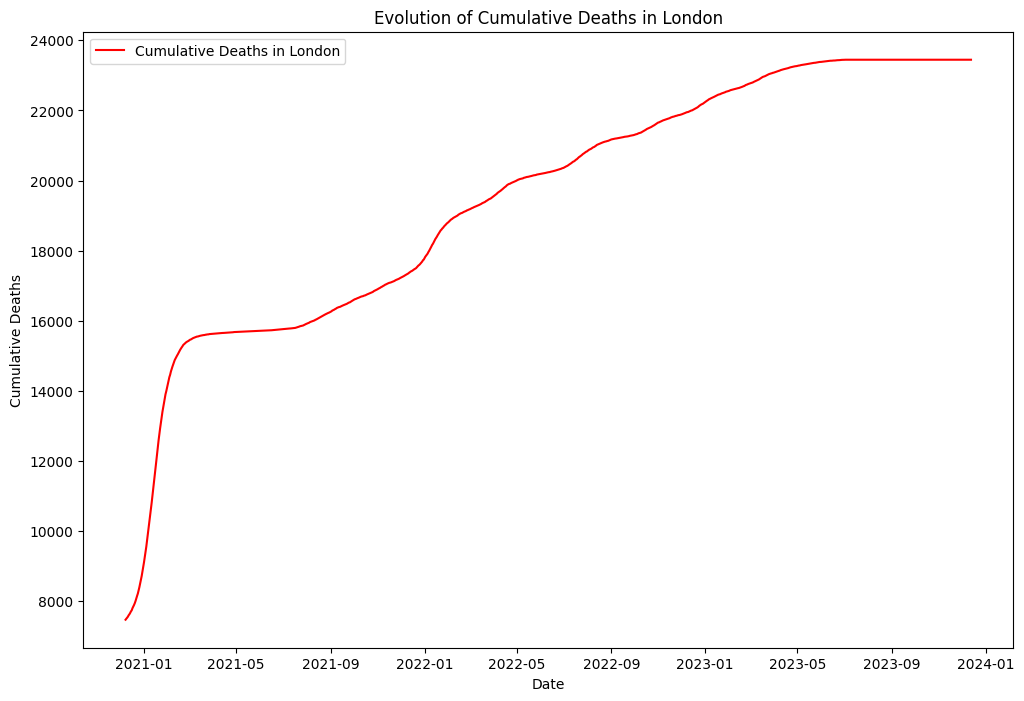

In [19]:
# 1. Aggregate the data
london_death_data = df_covid_data[df_covid_data['area'] == 'London'].copy() #get london only
# 2. Plot the data.
plt.figure(figsize=(12, 8))
plt.plot(london_death_data['date'], london_death_data['cumulative deaths'], label='Cumulative Deaths in London', color='red') #plot cumulative deats
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths') # in thousands
plt.title('Evolution of Cumulative Deaths in London')
plt.legend()
plt.show()
# 3. Question: Is there a noticeable period in time when the ongoing trend is broken? When?
# The number of deaths rapidly stops in around Feb 2021. This coincides with when the first vaccine rollout was happening in the UK.

### Task 19

In [20]:
# Question: Based on the data and plot from the last question, is there any similarity between trends in cumulative cases and cumulative deaths?
# Both the cumulative cases and the cumulative deaths had periods of rapid increases, however these occurred at different times. The large 
# increase in cumulative cases at the end of 2021 didn't lead to an increase in the cumulative deaths at the same time because the vaccine had already
# been rolled out.

### Task 20

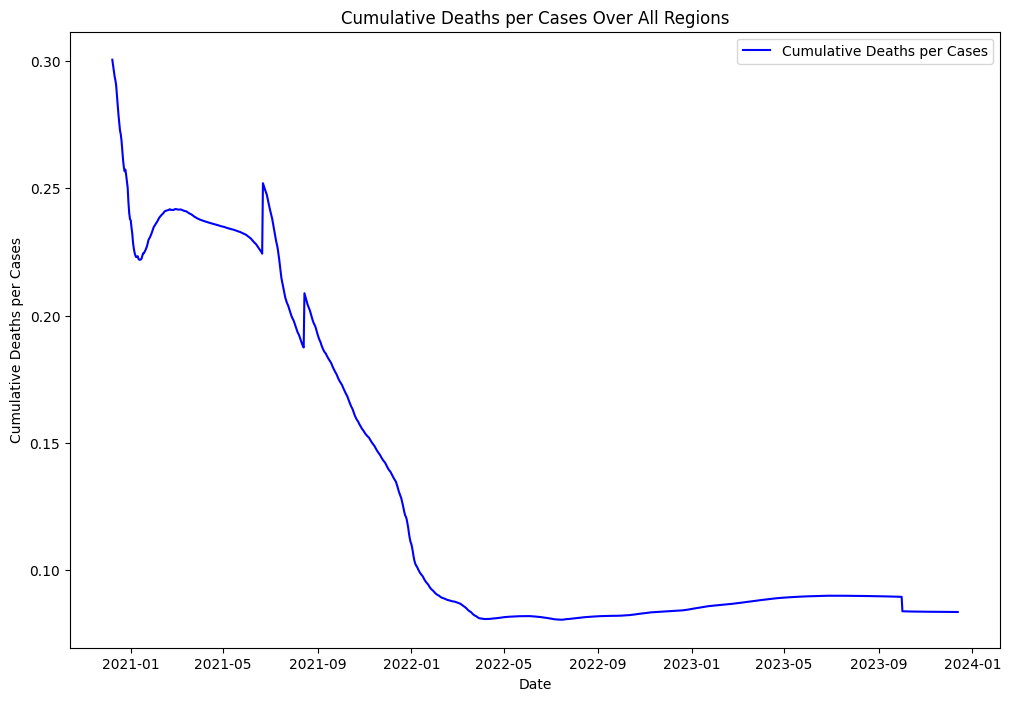

In [21]:
# 1. Aggregate the data
df_covid_data['cumulative deaths per cases'] = df_covid_data['cumulative deaths'] / df_covid_data['cumulative cases'] # calculate ratio by dividing deaths by cases
sum_deaths_per_cases = df_covid_data.groupby('date')['cumulative deaths per cases'].sum().reset_index() # sum regions
# 2. Plot the data
plt.figure(figsize=(12, 8))
plt.plot(sum_deaths_per_cases['date'], sum_deaths_per_cases['cumulative deaths per cases'], label='Cumulative Deaths per Cases', color='blue') #plot ratio
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths per Cases') # e.g. for every 10 cases, there are 2 deaths.
plt.title('Cumulative Deaths per Cases Over All Regions')
plt.legend()
plt.show()
# 3. Question: What overall trends can be seen?
# Ignoring the strange errors in the data, it can be seen that the ratio between cumulative cases and deaths fell sharply after Jan 2021 (vaccine rollout)
# but then rose again slightly, but then fell slowly until around May 2022, where it plateued.

### Task 21

In [22]:
# Task 21: Question: Based on the data and plot from the last question, it seems like the graph’s
# inclination gets steeper at a certain point. What could be a reasonable explanation?

# One explanation could be that the vaccine is rolled out to more age groups / the wider population.
# Another explanation is that the booster vaccine could've been made available to the older populations, lowering the death rate.

### Task 22

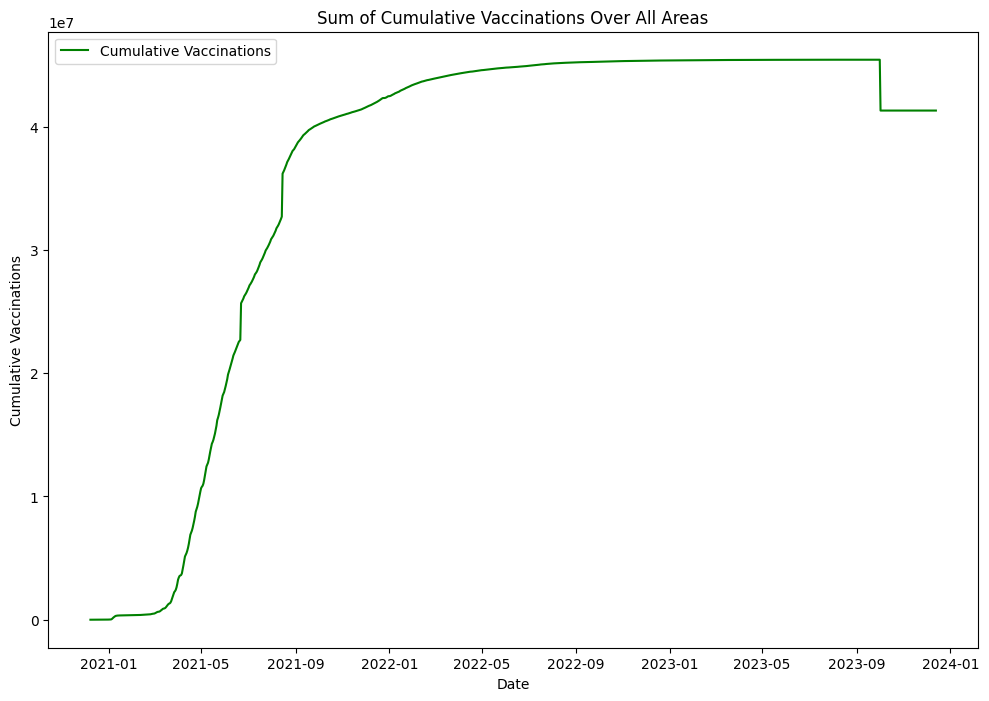

In [23]:
# 1. Aggregate the data
sum_cumulative_vaccinated = df_covid_data.groupby('date')['cumulative vaccinated'].sum().reset_index() #sum regions
# 2. Plot the data.
plt.figure(figsize=(12, 8))
plt.plot(sum_cumulative_vaccinated['date'], sum_cumulative_vaccinated['cumulative vaccinated'], label='Cumulative Vaccinations', color='green') # plot
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.title('Sum of Cumulative Vaccinations Over All Areas') # in 10s of millions
plt.legend()
plt.show()
# 3. Question: Are there any relationships between the trends seen here and the ones seen in Task 21?
# There is a steep increase in the cumulative vaccination rate during June/July 2021, which may explain the sharp drop in the case/death in the figure
# in Task 20 also in June/July 2021.

### Task 23

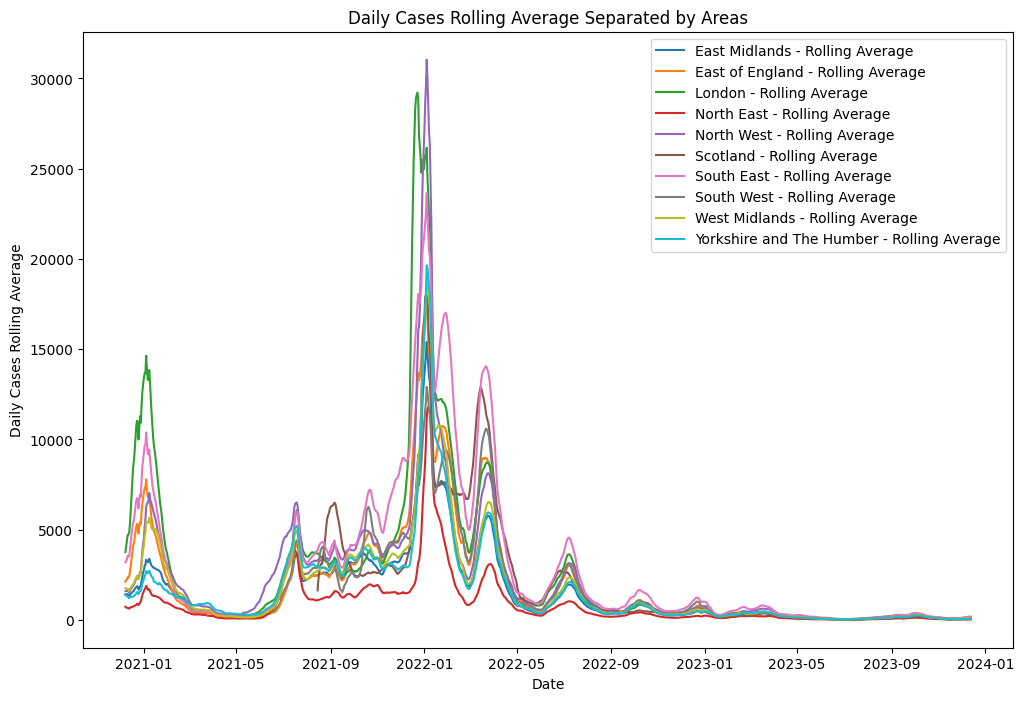

In [24]:
# 1. Aggregate the data
areas = df_covid_data['area'].unique() # get each area
plt.figure(figsize=(12, 8))
# 2. Plot the daily cases rolling average for each area
for area in areas: #iterate through each area
    area_data = df_covid_data[df_covid_data['area'] == area] # get area data
    area_data = area_data.sort_values(by='date') # sort by date
    #area_data['daily cases roll avg'] = area_data['daily cases roll avg'].rolling(window=7).mean() # get the 7 day rolling average using .rolling
    plt.plot(area_data['date'], area_data['daily cases roll avg'], label=f'{area} - Rolling Average') # plot each rolling average
plt.xlabel('Date')
plt.ylabel('Daily Cases Rolling Average')
plt.title('Daily Cases Rolling Average Separated by Areas')
plt.legend()
plt.show()
# 3. Question: What is the general trend of daily cases for each region, and what could be the potential reasons for that?
# The general trend of daily cases for each region was for a spike in early 2021, followed by a plateau for a few months, followed by a rise from
# around June/July 2021 until the end of 2021/early 2022, where there was a very large increase. 
# There could be a few potential reasons for these patterns. The early 2021 plateau could be explained by a nation-wide lockdown (England entered
# a full lockdown in Jan 2021), and the rise after could be explained by an easing of restrictions.
# The large increase at the end of 2021/early 2022 could be explained by the rollout of the vaccine, and the subsequent decrease in lockdown 
# restrictions this resulted in.

### Task 24

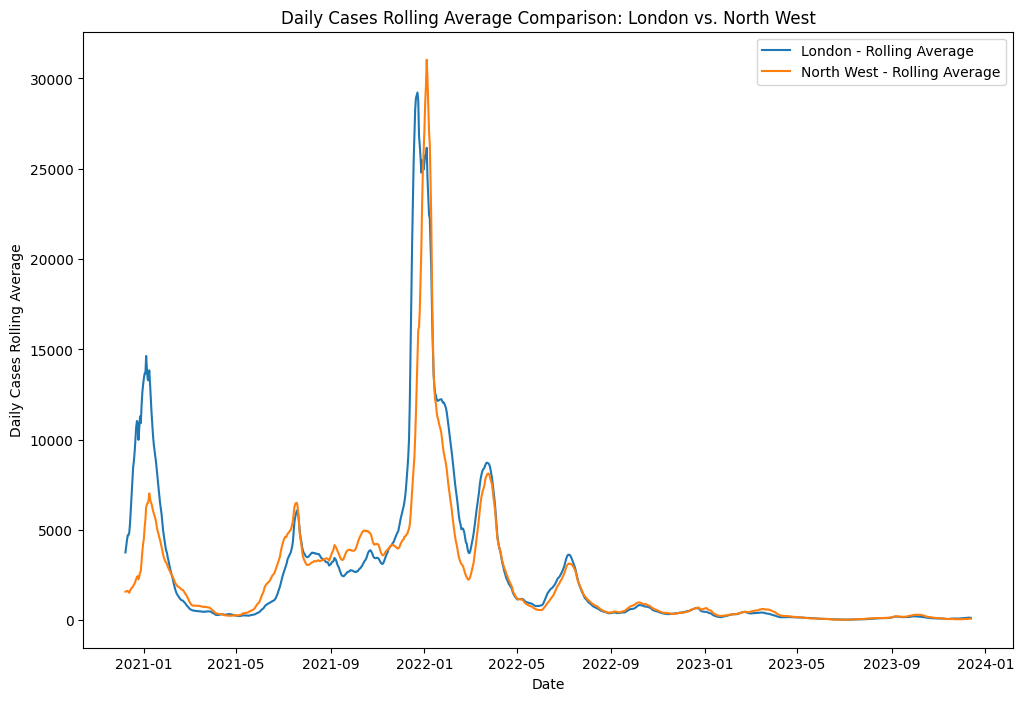

In [25]:
# Wales data initally worked, but upon testing again I found the data to be missing. I could not figure out why (as I tried fetching the data
# separately like I did with London), but the api still returned no data. As someone who was living in Cardiff during Covid, I remember the cases per
# 100,000 people being a lot higher than the rest of the country during Dec 2020, which may have been what this question was about.
# I decided to go with North West England instead, because much like Wales there is an urbanised core, and then a lot of rural space,
# which may give a similar result.

# 1. Aggregate the data
london_nw_data = df_covid_data[df_covid_data['area'].isin(['London', 'North West'])].copy()  # get data from london and nw england
# 2. Plot the data.
plt.figure(figsize=(12, 8))
for area in ['London', 'North West']: #iterate
    area_data = london_nw_data[london_nw_data['area'] == area] #get area data 
    plt.plot(area_data['date'], area_data['daily cases roll avg'], label=f'{area} - Rolling Average') # plot the rolling average
plt.xlabel('Date')
plt.ylabel('Daily Cases Rolling Average')
plt.title('Daily Cases Rolling Average Comparison: London vs. North West')
plt.legend()
plt.show()
# Question: What reasons there might be to justify this difference?
# England at the time had a 'traffic light' type system, where different regions were put under different tiers of lockdown depending on the covid rate.
# The lower daily cases rolling average in Jan 2021 may be because of this system. It may also be because of the population difference between London
# and the North West.

### Task 25

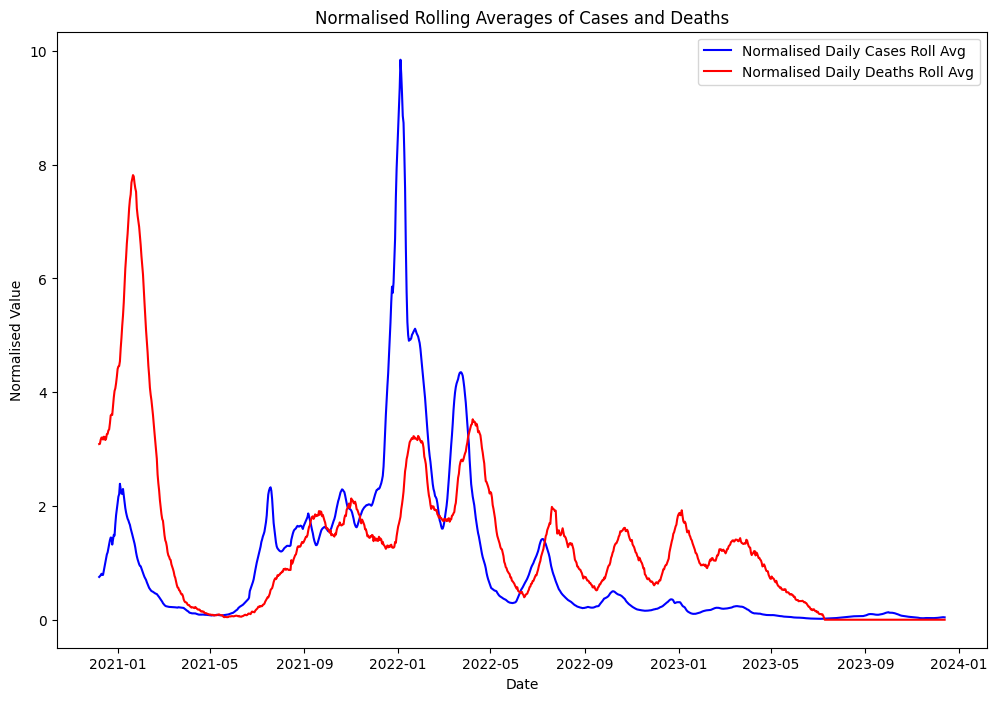

In [26]:
# 1. Aggregate the data
max_cases = df_covid_data.groupby('area')['daily cases roll avg'].transform('max') # get the max daily cases rolling average
max_deaths = df_covid_data.groupby('area')['daily deaths roll avg'].transform('max') # get the max daily deaths rolling average
df_covid_data['daily cases roll avg normalised'] = df_covid_data['daily cases roll avg'] / max_cases # normalise by dividing each column by max
df_covid_data['daily deaths roll avg normalised'] = df_covid_data['daily deaths roll avg'] / max_deaths
sum_normalized_cases = df_covid_data.groupby('date')['daily cases roll avg normalised'].sum() 
sum_normalized_deaths = df_covid_data.groupby('date')['daily deaths roll avg normalised'].sum()
# 2. Plot the data.
plt.figure(figsize=(12, 8))
plt.plot(sum_normalized_cases.index, sum_normalized_cases, label='Normalised Daily Cases Roll Avg', color='blue')
plt.plot(sum_normalized_deaths.index, sum_normalized_deaths, label='Normalised Daily Deaths Roll Avg', color='red')
plt.xlabel('Date')
plt.ylabel('Normalised Value')
plt.title('Normalised Rolling Averages of Cases and Deaths')
plt.legend()
plt.show()
# 3. Question: Are daily trends of cases and deaths increasing and decreasing at the same rates? What part of the plot tells you this?
# The daily trends of cases increase and decrease at the same time, but at different rates. The normalised daily death rolling average increases at
# a much higher reate in early 2021 when compared to the cases, however the cases increases at a much higher rate in early 2022 when compared to the
# death rolling average.

### Task 26

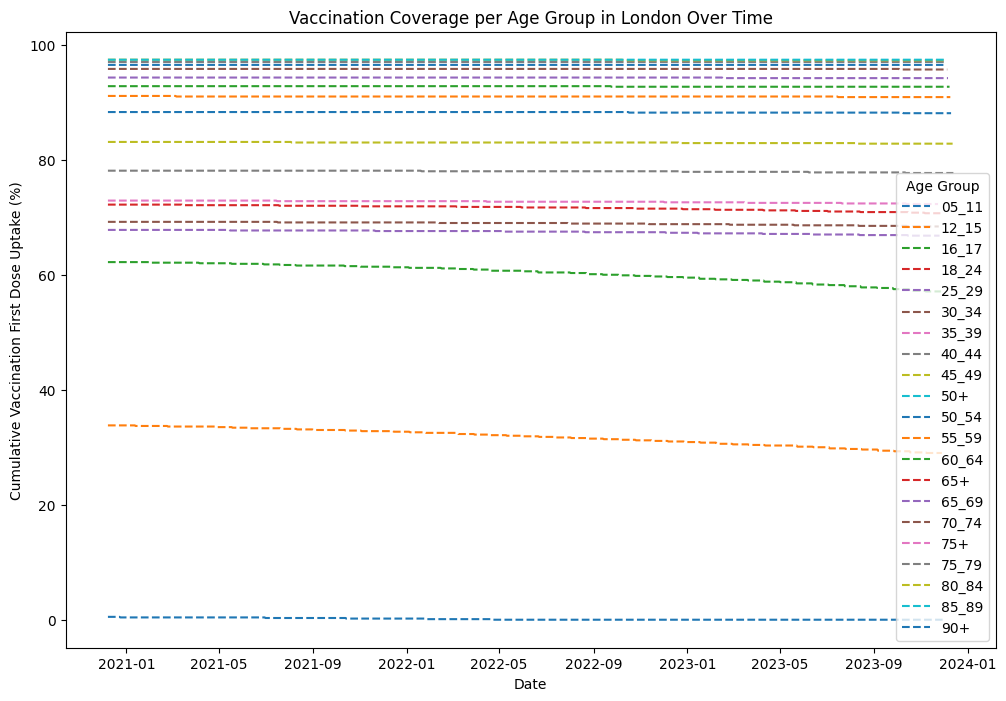

In [27]:
# For the final question, I was unsuccessful at plotting the data. Without backfilling, there doesn't seem to be enough data for it to plot onto a graph.
# If I do backfill, it causes the straight lines you can see below. I wasn't sure how to fix this.
# 1. Aggregate the data
df_london = df_vaccinations_wide[df_vaccinations_wide['area'] == 'London'] #split london from rest of data
df_scotland = df_vaccinations_wide[df_vaccinations_wide['area'] == 'Scotland'] # split scotland from rest of data
df_london_filled = df_london.pivot(index='date', columns='age', values='cumVaccinationFirstDoseUptakeByVaccinationDatePercentage').bfill() # used bfill to get rid of missing values
# 2. Plot the data
plt.figure(figsize=(12, 8))
for age_group in df_london_filled.columns:
    plt.plot(df_london_filled.index, df_london_filled[age_group], '--', label=age_group)

plt.title('Vaccination Coverage per Age Group in London Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccination First Dose Uptake (%)')
plt.legend(title='Age Group')
plt.show()
# 3. Question: Were all age groups vaccinated equally and at the same time, or was there a strategy employed? What strategy does the plot indicate and why?
# Although the plot does not show it, not all age groups were vaccinated equally at the same time. Older age ranges were prioritised for vaccination,
# followed by younger and younger age groups until the population was vaccinated (excluding children who were also prioritised).